# **Import Libaries**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# **Load the data**

In [ ]:
wine_data = pd.read_csv('wine_dataset.csv')


print(wine_data.isnull().sum())


X = wine_data.drop('quality', axis=1)
y = wine_data['quality']


label_encoder = LabelEncoder()
X['type'] = label_encoder.fit_transform(X['type'])

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


# **Split the data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='mean'), X.columns),  # impute missing values with mean
        ('onehot', OneHotEncoder(), ['type']),
    ],
)

# **Model Creation**

In [ ]:
model = LinearRegression()

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model),
])


# **Perform cross-validation**

In [ ]:
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error', error_score='raise')
cv_mse = -cv_scores.mean()

print(f'Cross-validated Mean Squared Error: {cv_mse}')

Cross-validated Mean Squared Error: 0.5563245952170608


# **Train the Data**

In [ ]:
pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

# **Evaluate**

In [ ]:
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 0.47142720502577423


# **Visualization**

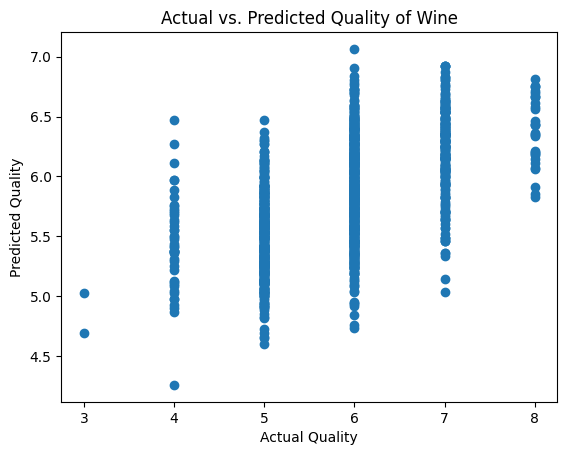



Cross-validated Mean Squared Error: 0.5563245952170608

Mean Squared Error on Test Set: 0.47142720502577423



In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted Quality of Wine')
plt.show()
print('\n')
print(f'Cross-validated Mean Squared Error: {cv_mse}\n')

print(f'Mean Squared Error on Test Set: {mse}\n')